# Question 2 Gradient Descent for Regression
Mandana Samiei 
ID: 260779555

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
from numpy.linalg import inv
from numpy import genfromtxt
from math import exp
import random

%matplotlib inline

def load_shuffeled_data(file_name):
    my_data = genfromtxt(file_name, delimiter=',')
    np.random.shuffle(my_data)
    X = my_data[:,0]
    Y = my_data[:,1]
    return X,Y 

The indicated alpha (1e-6) was very small and my computer couldn't converge to the local minima with this learning rate, so I considered another alpha which is exp(-6) and showed the result with this learning rate

In [12]:
class LinearRegression_SGD(object):
    def __init__(self, X, Y, valid_x, valid_y, test_x, test_y):
        self.X = X
        self.Y = Y
        self.valid_x = valid_x
        self.valid_y = valid_y
        self.test_x = test_x
        self.test_y = test_y   
    def get_feat(self, x, degree):
        features = np.zeros(shape=(x.shape[0],degree+1))
        for i in range(degree+1):
            features[:,i] = np.power(x,i) 
        return features 
    def train_sgd(self,alpha=exp(-6)):
        eps = 1e-10
        self.num_of_epochs = 0
        w = np.ones(2) #Initial Value for W of each iteration on training examples
        last_w = np.zeros(2) 
        w_epoch_list = [] # to keep w of 5 diffferent epoch to compare
        w_epoch = w # w of each epoch
        w_last_epoch = last_w
        valid_mse_sgd = []
        train_mse_sgd = []
        while(np.abs((w_epoch - w_last_epoch)[0]) > eps and np.abs((w_epoch - w_last_epoch)[1] > eps)): 
            w_last_epoch = w_epoch
            for i in range(self.X.size): # traverse training data points to calculate w for each instance
                self.feat = np.asarray([1, self.X[i]]).reshape((1,2))
                predicted_y = np.dot(self.feat,w)
                loss = predicted_y - self.Y[i]
                gradient = 2*np.dot(self.feat.T,loss)
                w = w - alpha*gradient  #Update W in each iteration
            w_epoch = w #update W of an epoch
            self.num_of_epochs = self.num_of_epochs + 1
            valid_mse_sgd.append(((np.dot(self.get_feat(self.valid_x,1),w_epoch) - self.valid_y)**2).mean(axis=0)) 
            train_mse_sgd.append(((np.dot(self.get_feat(self.X,1),w_epoch) - self.Y)**2).mean(axis=0))
            if (self.num_of_epochs%5 == 0):
                w_epoch_list.append(w_epoch)
        print "\nThe validation MSE is: {} \nwith learning rate: {}" .format(valid_mse_sgd[-1],alpha)
        print "total number of epochs: {}" .format(self.num_of_epochs)
        print "W:{}" .format(w_epoch)
        return w, w_epoch_list, valid_mse_sgd, train_mse_sgd
    
    def visualize_learning_curve(self,valid_mse, train_mse):
        print "\n __________________________Visualize Learning Curve_____________________________\n"
        ax, fig = plt.subplots(0,figsize=(10,8))
        x_range = np.arange(self.num_of_epochs)
        plt.plot(x_range, valid_mse, c="b", label="validation mse") # Validation MSE
        plt.plot(x_range, train_mse, c="y", label="train mse") # Training MSE
        plt.ylabel('validation | training MSE')
        plt.xlabel('epochs')
        plt.title('Learning Curve')
        legend = plt.legend(loc='best', shadow=True)
        plt.show()
    
    def visualize_fit(self, w, n_points=100):
        print "\n _____________________________Visualize the fit_________________________________\n"
        ax, fig = plt.subplots(0,figsize=(10,8))
        plt.scatter(self.X, self.Y, s=20, c="#1E8BC3", label="Training points")
        plt.scatter(self.valid_x, self.valid_y, s=20, c="g", label="Valid points")
        plt.scatter(self.test_x, self.test_y, s=20, c="y", label="Test points")
        x_min, x_max = self.X.min(),self.X.max()
        x_range = np.linspace(x_min, x_max, 100)
        x_feat = self.get_feat(x_range,1)
        colors=['r', 'c', 'g', 'k', '#F9690E']
        for i in range(5):
            predicted_y= self.predict(x_feat,w[i])
            plt.plot(x_range, predicted_y, color="{}".format(colors[i]), label="curve {}".format(i))
        legend = plt.legend(loc='upper left', shadow=True)
        plt.ylabel('Predictions')
        plt.xlabel('data points')
        plt.title('Train and Validatin Data points and the fit using W of 5 different epochs')
        plt.show()
    def predict(self, X, w):
        y = np.dot(X, w)
        return y
    def dif_learning_rate(self):
        alphas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
        Ws = []
        v_mse = []
        for i in range(6):
            w,_,valid_mse,_ = self.train_sgd(alphas[i])
            Ws.append(w)
            v_mse.append(valid_mse[-1])
        print "valid mses:{}" .format(v_mse)
        self.test_performance(Ws[v_mse.index(min(v_mse))], alphas[v_mse.index(min(v_mse))])
    
    def test_performance(self,w,alpha):
        test_mse= ((np.dot(self.get_feat(self.test_x,1), w) - self.test_y)**2).mean(axis=0)
        print "\nTest MSE of the best linear model is:{} with learning rate = {}" .format(test_mse,alpha)

Main Function


The validation MSE is: 0.0741733423788 
with learning rate: 0.00247875217667
total number of epochs: 132
W:[ 3.57486415  4.319012  ]

 __________________________Visualize Learning Curve_____________________________



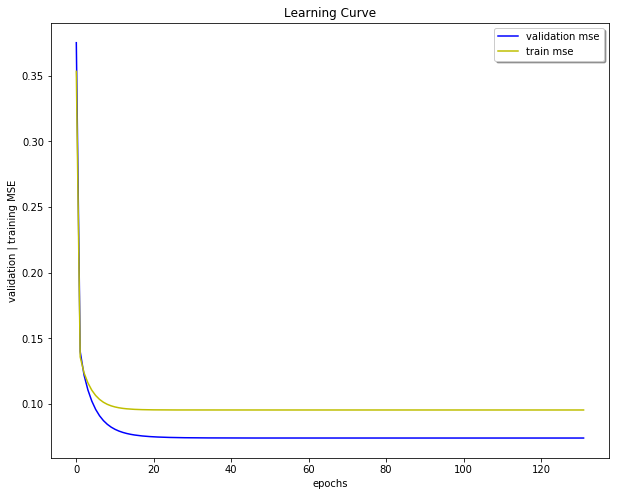


 _____________________________Visualize the fit_________________________________



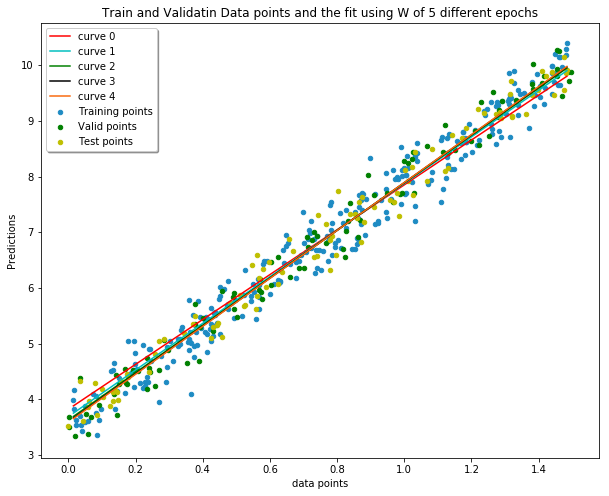


The validation MSE is: 1.03694912146e+171 
with learning rate: 1
total number of epochs: 1
W:[ -3.21581135e+85  -5.85458613e+82]

The validation MSE is: 0.0783222829635 
with learning rate: 0.1
total number of epochs: 5
W:[ 3.51631257  4.32429332]

The validation MSE is: 0.074456505501 
with learning rate: 0.01
total number of epochs: 36
W:[ 3.57484928  4.31417041]

The validation MSE is: 0.0740845113151 
with learning rate: 0.001
total number of epochs: 313
W:[ 3.57609302  4.32016513]

The validation MSE is: 0.0740697062725 
with learning rate: 0.0001
total number of epochs: 2757
W:[ 3.57650401  4.32029457]

The validation MSE is: 0.0740702984552 
with learning rate: 1e-05
total number of epochs: 23912
W:[ 3.57652083  4.32027626]
valid mses:[1.0369491214612988e+171, 0.078322282963512013, 0.074456505501030099, 0.074084511315147317, 0.074069706272506003, 0.074070298455161152]

Test MSE of the best linear model is:0.0692334507436 with learning rate = 0.0001


In [13]:
X, Y = load_shuffeled_data('hwk1_datasets/Datasets/Dataset_2_train.csv')
valid_X, valid_Y = load_shuffeled_data('hwk1_datasets/Datasets/Dataset_2_valid.csv')
test_X, test_Y = load_shuffeled_data('hwk1_datasets/Datasets/Dataset_2_test.csv')

model = LinearRegression_SGD(X, Y, valid_X, valid_Y, test_X, test_Y)
w, w_of_epochs, v_mse, tr_mse = model.train_sgd()
model.visualize_learning_curve(v_mse, tr_mse)
model.visualize_fit(w_of_epochs)
model.dif_learning_rate()